# **AIN212 Data Science Project**
#### **Members:**
* Tanay Tekön 2200765013
* Harun Harman 2200765008

# **Data Collection**
* We chose this COVID-19 Dataset to use in our project. (url="https://www.kaggle.com/datasets/meirnizri/covid19-dataset")
* Our goal is predict whether the patient is in high risk or not.

## Given information about the dataset:
* The dataset was provided by the Mexican government.
* It contains an enormous number of anonymized patient-related information including pre-conditions.
* It consists of 21 unique features and 1,048,576 unique patients.
* In the Boolean features, 1 means "yes" and 2 means "no". Values as 97 and 99 are missing data.

## Given information about the features:
* sex: 1 for female and 2 for male.
* age: age of the patient.
* classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
* patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
* pneumonia: whether the patient already have air sacs inflammation or not.
* pregnancy: whether the patient is pregnant or not.
* diabetes: whether the patient has diabetes or not.
* copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
* asthma: whether the patient has asthma or not.
* inmsupr: whether the patient is immunosuppressed or not.
* hypertension: whether the patient has hypertension or not.
* cardiovascular: whether the patient has heart or blood vessels related disease.
* renal chronic: whether the patient has chronic renal disease or not.
* other disease: whether the patient has other disease or not.
* obesity: whether the patient is obese or not.
* tobacco: whether the patient is a tobacco user.
* usmr: Indicates whether the patient treated medical units of the first, second or third level.
* medical unit: type of institution of the National Health System that provided the care.
* intubed: whether the patient was connected to the ventilator.
* icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
* date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

# **Data Preprocessing and Cleaning**

### In order to our plots done by Matplotlib properly work in Google Collab, we need to upgrade the verison of Matplotlib first
After that, we need to restart the runtime.

In [ ]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Importing needed libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Read and overview the dataset

In [ ]:
url='https://drive.google.com/file/d/1JcomEOabPoW2NRfAxIpHlcEPklLAP4Y6/view?usp=share_link'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)
print("Shape:", df.shape)
df.head()

Shape: (1048575, 21)


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


### Checking for NaN values

In [ ]:
df.isna().sum().sum()

0

* There are no NaN values.

* Dataset has NaN values as 97 and 99. We will deal with them later.

### Checking for number of unique values

In [ ]:
for column in df.columns:
    print(column, len(df[column].unique()))

USMER 2
MEDICAL_UNIT 13
SEX 2
PATIENT_TYPE 2
DATE_DIED 401
INTUBED 4
PNEUMONIA 3
AGE 121
PREGNANT 4
DIABETES 3
COPD 3
ASTHMA 3
INMSUPR 3
HIPERTENSION 3
OTHER_DISEASE 3
CARDIOVASCULAR 3
OBESITY 3
RENAL_CHRONIC 3
TOBACCO 3
CLASIFFICATION_FINAL 7
ICU 4


### Check unique values in all columns except "DATE_DIED" and "AGE"
* Since "DATE_DIED" and "AGE" have too many unique values, we will deal with these columns separately.

In [ ]:
columns = list(df.columns)
columns.remove("DATE_DIED")
columns.remove("AGE")
for column in columns:
    print(column+":")
    print(df[column].value_counts())
    print()

USMER:
2    662903
1    385672
Name: USMER, dtype: int64

MEDICAL_UNIT:
12    602995
4     314405
6      40584
9      38116
3      19175
8      10399
10      7873
5       7244
11      5577
13       996
7        891
2        169
1        151
Name: MEDICAL_UNIT, dtype: int64

SEX:
1    525064
2    523511
Name: SEX, dtype: int64

PATIENT_TYPE:
1    848544
2    200031
Name: PATIENT_TYPE, dtype: int64

INTUBED:
97    848544
2     159050
1      33656
99      7325
Name: INTUBED, dtype: int64

PNEUMONIA:
2     892534
1     140038
99     16003
Name: PNEUMONIA, dtype: int64

PREGNANT:
97    523511
2     513179
1       8131
98      3754
Name: PREGNANT, dtype: int64

DIABETES:
2     920248
1     124989
98      3338
Name: DIABETES, dtype: int64

COPD:
2     1030510
1       15062
98       3003
Name: COPD, dtype: int64

ASTHMA:
2     1014024
1       31572
98       2979
Name: ASTHMA, dtype: int64

INMSUPR:
2     1031001
1       14170
98       3404
Name: INMSUPR, dtype: int64

HIPERTENSION:
2     88274

* Values are correct according to given information about the dataset.

### Checking values in "AGE" column

In [ ]:
print("AGE data type:", df['AGE'].dtype)
print("Min age:", min(df['AGE']))
print("Max age:", max(df['AGE']))

AGE data type: int64
Min age: 0
Max age: 121


* Values in "AGE" column are correct according to given information about the dataset.

### In order to use "DATE_DIED" feature in machine learning algorithms, convert it to the boolean variable "DEAD"
* "DEAD" variable indicates whether the patient is dead or alive.

* This variable will be our target variable.

* We will drop "DATE_DIED" column, because we do not need it anymore.

In [ ]:
# "9999-99-99" value means this patient is alive, other values mean the patient is dead.
df["DEAD"] = np.where(df["DATE_DIED"]=="9999-99-99", 2, 1)
df.drop(columns="DATE_DIED", inplace=True)

### Missing value analysis of "INTUBED" feature
Relation between "INTUBED" and "PATIENT_TYPE" features can be seen in the bar plot below:

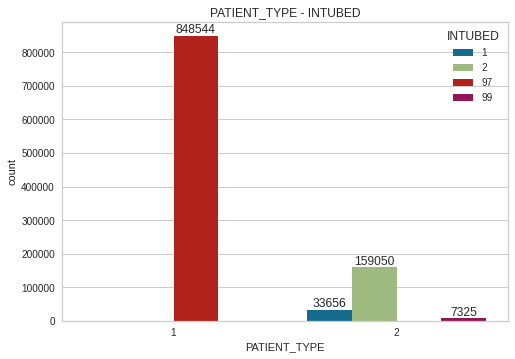

In [ ]:
fig, ax = plt.subplots()
sns.countplot(x=df['PATIENT_TYPE'], hue=df['INTUBED'] , data=df, ax=ax)
for bar in ax.containers:
    ax.bar_label(bar)
ax.set_title("PATIENT_TYPE - INTUBED")
plt.show()

* Patients who returned home have "INTUBED" value 97.

* Since they cannot be intubed, we can convert 97 values in "INTUBED" feature to 2.

In [ ]:
df["INTUBED"] = df["INTUBED"].replace(97,2)

### Missing value analysis of "ICU" feature
Relation between "ICU" and "PATIENT_TYPE" features can be seen in the bar plot below:

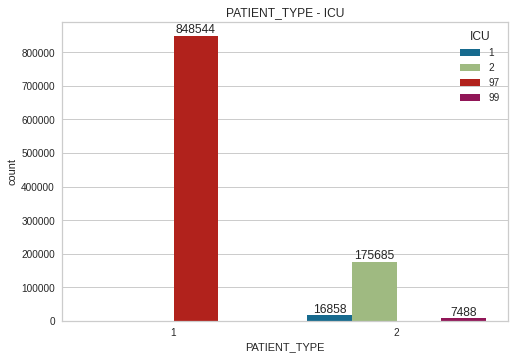

In [ ]:
fig, ax = plt.subplots()
sns.countplot(x=df['PATIENT_TYPE'], hue=df['ICU'] , data=df, ax=ax)
for bar in ax.containers:
    ax.bar_label(bar)
ax.set_title("PATIENT_TYPE - ICU")
plt.show()

* Patients who returned home have "ICU" value 97.

* Since they cannot be admitted to an Intensive Care Unit, we can convert 97 values in "ICU" feature to 2.

In [ ]:
df["ICU"] = df["ICU"].replace(97,2)

### Missing value analysis of "PREGNANT" feature
Relation between "PREGNANT" and "SEX" features can be seen in the bar plot below:

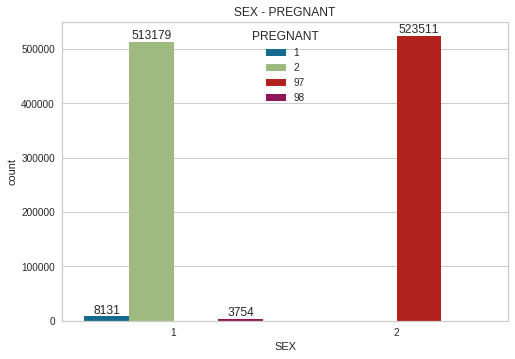

In [ ]:
fig, ax = plt.subplots()
sns.countplot(x=df['SEX'], hue=df['PREGNANT'], data=df, ax=ax)
for bar in ax.containers:
    ax.bar_label(bar)
ax.set_title("SEX - PREGNANT")
ax.legend(loc="upper center", title="PREGNANT")
plt.show()

* Male patients have "PREGNANT" value 97.

* Since males cannot be pregnant, we can convert 97 values in "PREGNANT" feature to 2.

In [ ]:
df["PREGNANT"] = df["PREGNANT"].replace(97,2)

### Dropping missing values

In [ ]:
dataPointsBeforeDrop = df.shape[0]

df = df[(df["INTUBED"] == 1) | (df["INTUBED"] == 2)]
df = df[(df["PNEUMONIA"] == 1) | (df["PNEUMONIA"] == 2)]
df = df[(df["PREGNANT"] == 1) | (df["PREGNANT"] == 2)]
df = df[(df["DIABETES"] == 1) | (df["DIABETES"] == 2)]
df = df[(df["COPD"] == 1) | (df["COPD"] == 2)]
df = df[(df["ASTHMA"] == 1) | (df["ASTHMA"] == 2)]
df = df[(df["INMSUPR"] == 1) | (df["INMSUPR"] == 2)]
df = df[(df["HIPERTENSION"] == 1) | (df["HIPERTENSION"] == 2)]
df = df[(df["OTHER_DISEASE"] == 1) | (df["OTHER_DISEASE"] == 2)]
df = df[(df["CARDIOVASCULAR"] == 1) | (df["CARDIOVASCULAR"] == 2)]
df = df[(df["OBESITY"] == 1) | (df["OBESITY"] == 2)]
df = df[(df["RENAL_CHRONIC"] == 1) | (df["RENAL_CHRONIC"] == 2)]
df = df[(df["TOBACCO"] == 1) | (df["TOBACCO"] == 2)]
df = df[(df["ICU"] == 1) | (df["ICU"] == 2)]

print("Number of dropped data points:", dataPointsBeforeDrop-df.shape[0])
print("New shape:", df.shape)

Number of dropped data points: 28909
New shape: (1019666, 21)


### Creating dummy variables for categorical features
* We have only "MEDICAL_UNIT" as a categorical feature.

In [ ]:
df = pd.get_dummies(df,columns=["MEDICAL_UNIT"],drop_first=True)

### Convert the values of the boolean features to 0 and 1

In [ ]:
bool_features = df.columns.to_list()
bool_features.remove("AGE")
bool_features.remove("CLASIFFICATION_FINAL")

for column in bool_features:
    df[column] = df[column].replace([1,2], [1,0])

### Rename some features for better understanding

In [ ]:
df.rename(columns={"SEX":"SEX_FEMALE"}, inplace = True)
df.rename(columns={"PATIENT_TYPE":"PATIENT_TYPE_RETURNED_HOME"}, inplace = True)
df.rename(columns={"USMER":"USMER_FIRST"}, inplace = True)

# **Data Exploration and Analysis**

### Distribution of the target variable

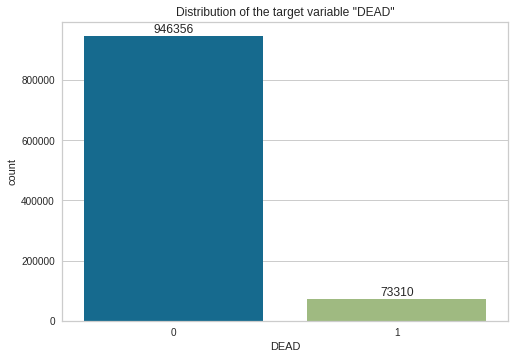

Target distribution ratio: 0.07746556264238828


In [ ]:
fig, ax = plt.subplots()
sns.countplot(x=df['DEAD'], data=df, ax=ax)
for bar in ax.containers:
    ax.bar_label(bar)
ax.set_title("Distribution of the target variable \"DEAD\"")
plt.show()

target_counts = df['DEAD'].value_counts()
target_distribution_ratio = target_counts[1]/target_counts[0]
print("Target distribution ratio:", target_distribution_ratio)

* Distribution of the target variable is imbalanced.

* This will may cause some issues about our models' ability of predicting for datapoints which have truth value 1 for the target.

### Distribution of the features

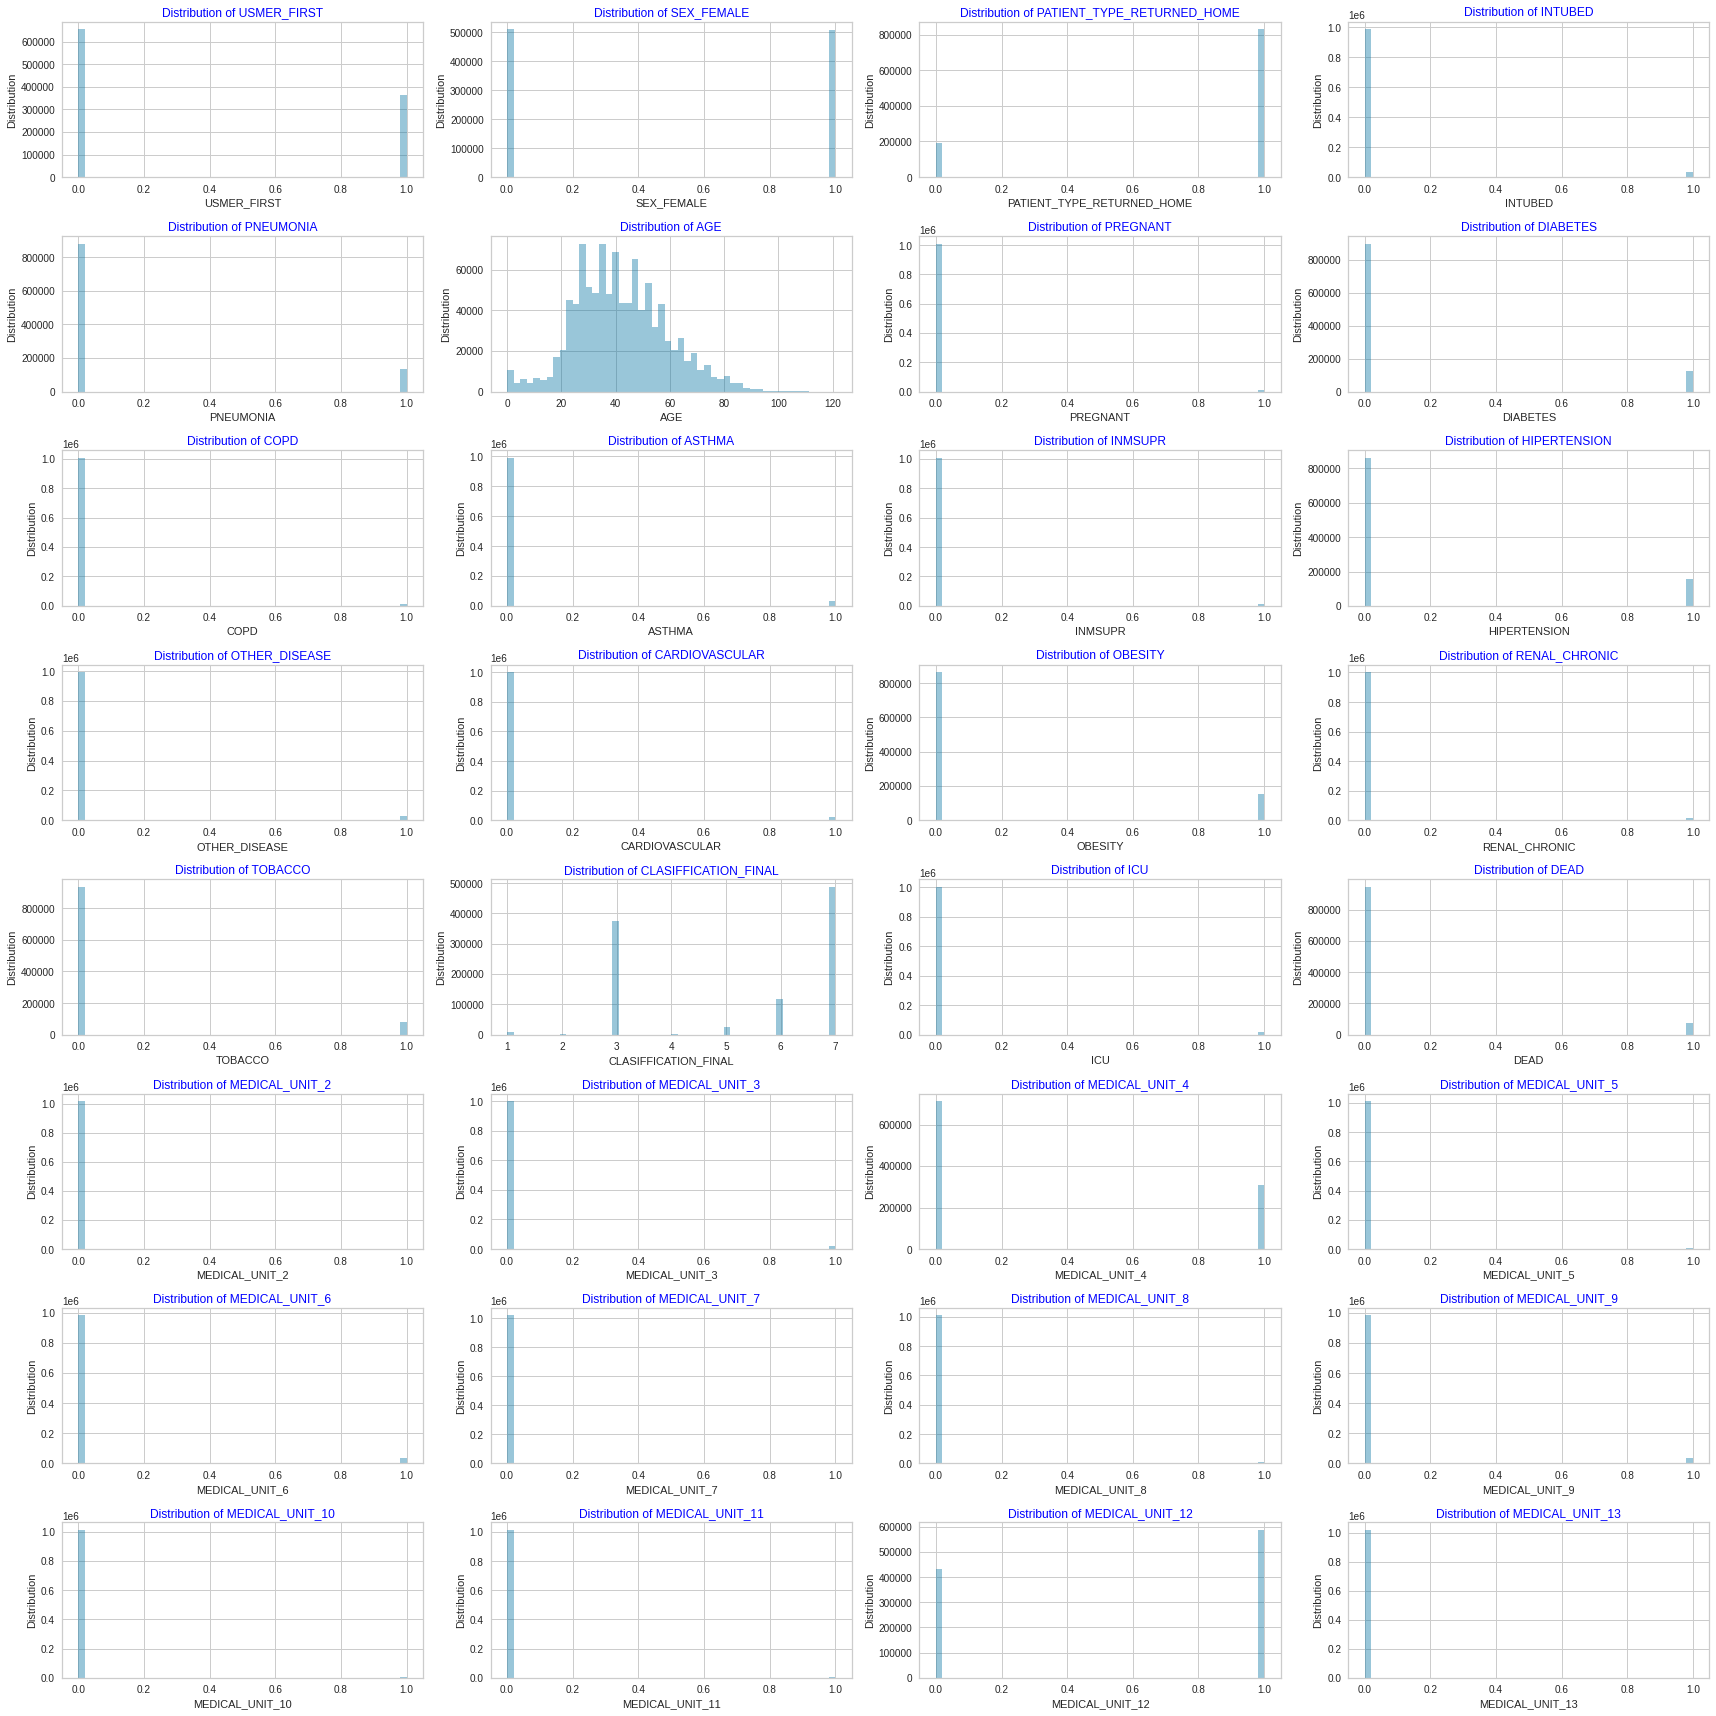

In [ ]:
fig = plt.figure(figsize=(24,24))
for i, column in enumerate(df.columns):
    ax = fig.add_subplot(8,4,i+1)
    sns.distplot(df[column].ffill(), kde=False)
    ax.set_title("Distribution of "+column, color='Blue')
    plt.ylabel('Distribution')
fig.tight_layout()
plt.show()

* Only **"AGE"** feature is continious in our data.

### Correlation Heatmap

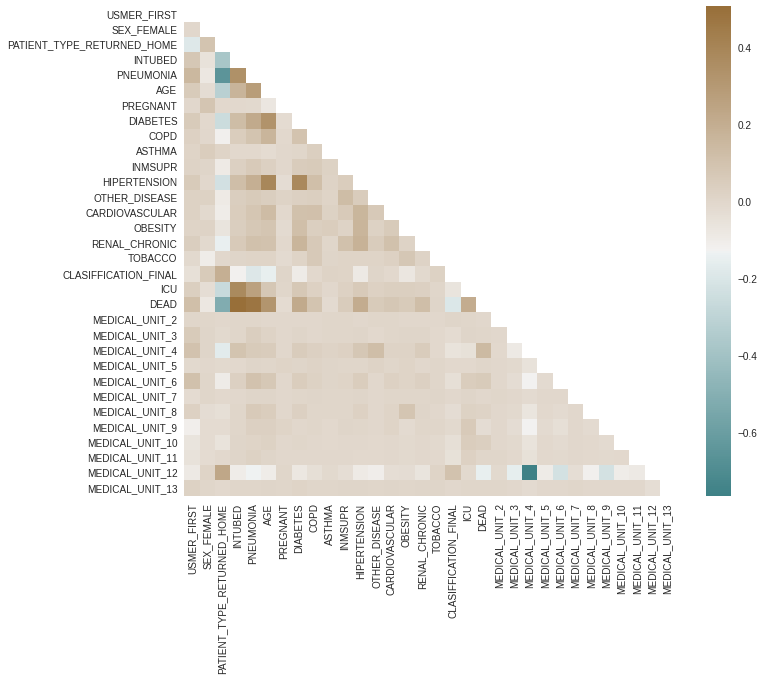

In [ ]:
fig, ax = plt.subplots(figsize=(11, 9))

corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(200, 50, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, ax=ax)
plt.show()

* As seen from the heatmap, target column "DEAD" is more related with features; "PATIENT_TYPE_RETURNED_HOME", "INTUBED", "PNEUMONIA" and "AGE".

#### Clustering Analysis For the Data
* For clustering analysis, since we have too large data, we choose a sample dataframe and make our analysis according to that sample with size 20,000.

In [ ]:
sampled_df = df.sample(n=20000)

#### Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
sampled_scaled_data = scaler.fit_transform(sampled_df)

#Turn scaled dataset into a pandas dataframe
sampled_scaled_df = pd.DataFrame(sampled_scaled_data, columns=sampled_df.columns)

#### Dimensionality Reduction
* Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.

* Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

* We reduce the dimensionality 3D to get representation in 3D.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_df = pd.DataFrame(pca.fit_transform(sampled_scaled_df), columns=(["col1","col2", "col3"]))

#### 3D projection of the dimensionally reduced dataset

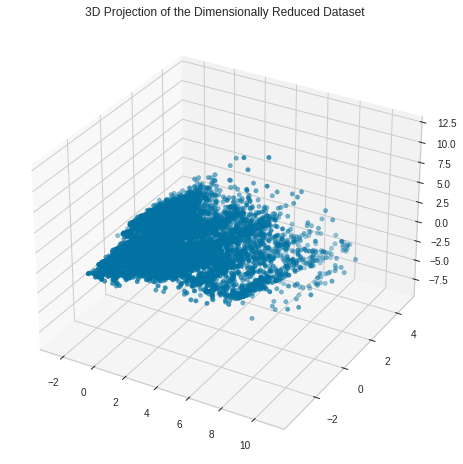

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(pca_df["col1"], pca_df["col2"], pca_df["col3"])
ax.set_title("3D Projection of the Dimensionally Reduced Dataset")
plt.show()

#### Performing elbow method for agglomerative clustering

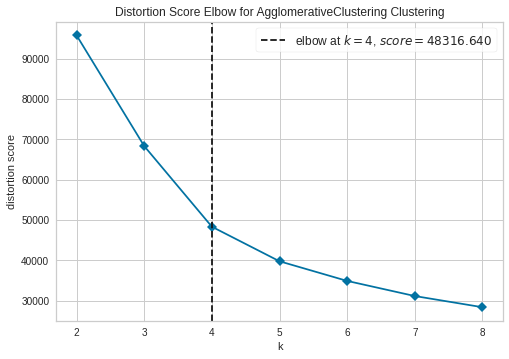

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer

elbow = KElbowVisualizer(AgglomerativeClustering(), k=8, timings=False)
elbow.fit(pca_df)
elbow.finalize()

* According to KELbowVisualizer, by using distortion scores, k=4 is the optimal value for the clustering.

#### Creating agglomerative clustering model

In [ ]:
agglomerative = AgglomerativeClustering(n_clusters=4).fit(pca_df)

# Adding clusters to pca_df and sampled_df
pca_df['Clusters'] = agglomerative.labels_
sampled_df['Clusters'] = agglomerative.labels_

#### Showing clusters on dimensionally reduced data with scatter plot

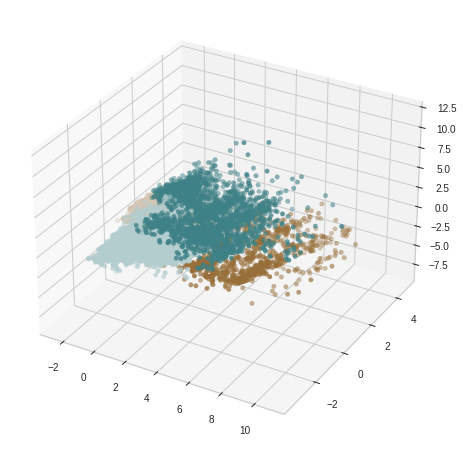

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d')
ax.scatter(pca_df["col1"], pca_df["col2"], pca_df["col3"], c=pca_df['Clusters'], cmap=cmap)
plt.show()

#### Distribution of the Clusters

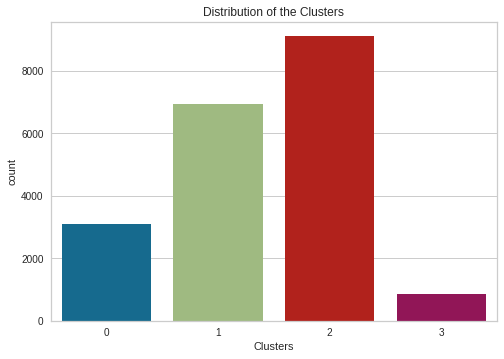

In [ ]:
fig, ax = plt.subplots()
sns.countplot(x=sampled_df['Clusters'], ax=ax)
ax.set_title("Distribution of the Clusters")
plt.show()

#### Showing the formation of the clusters on each feature with "DEAD"

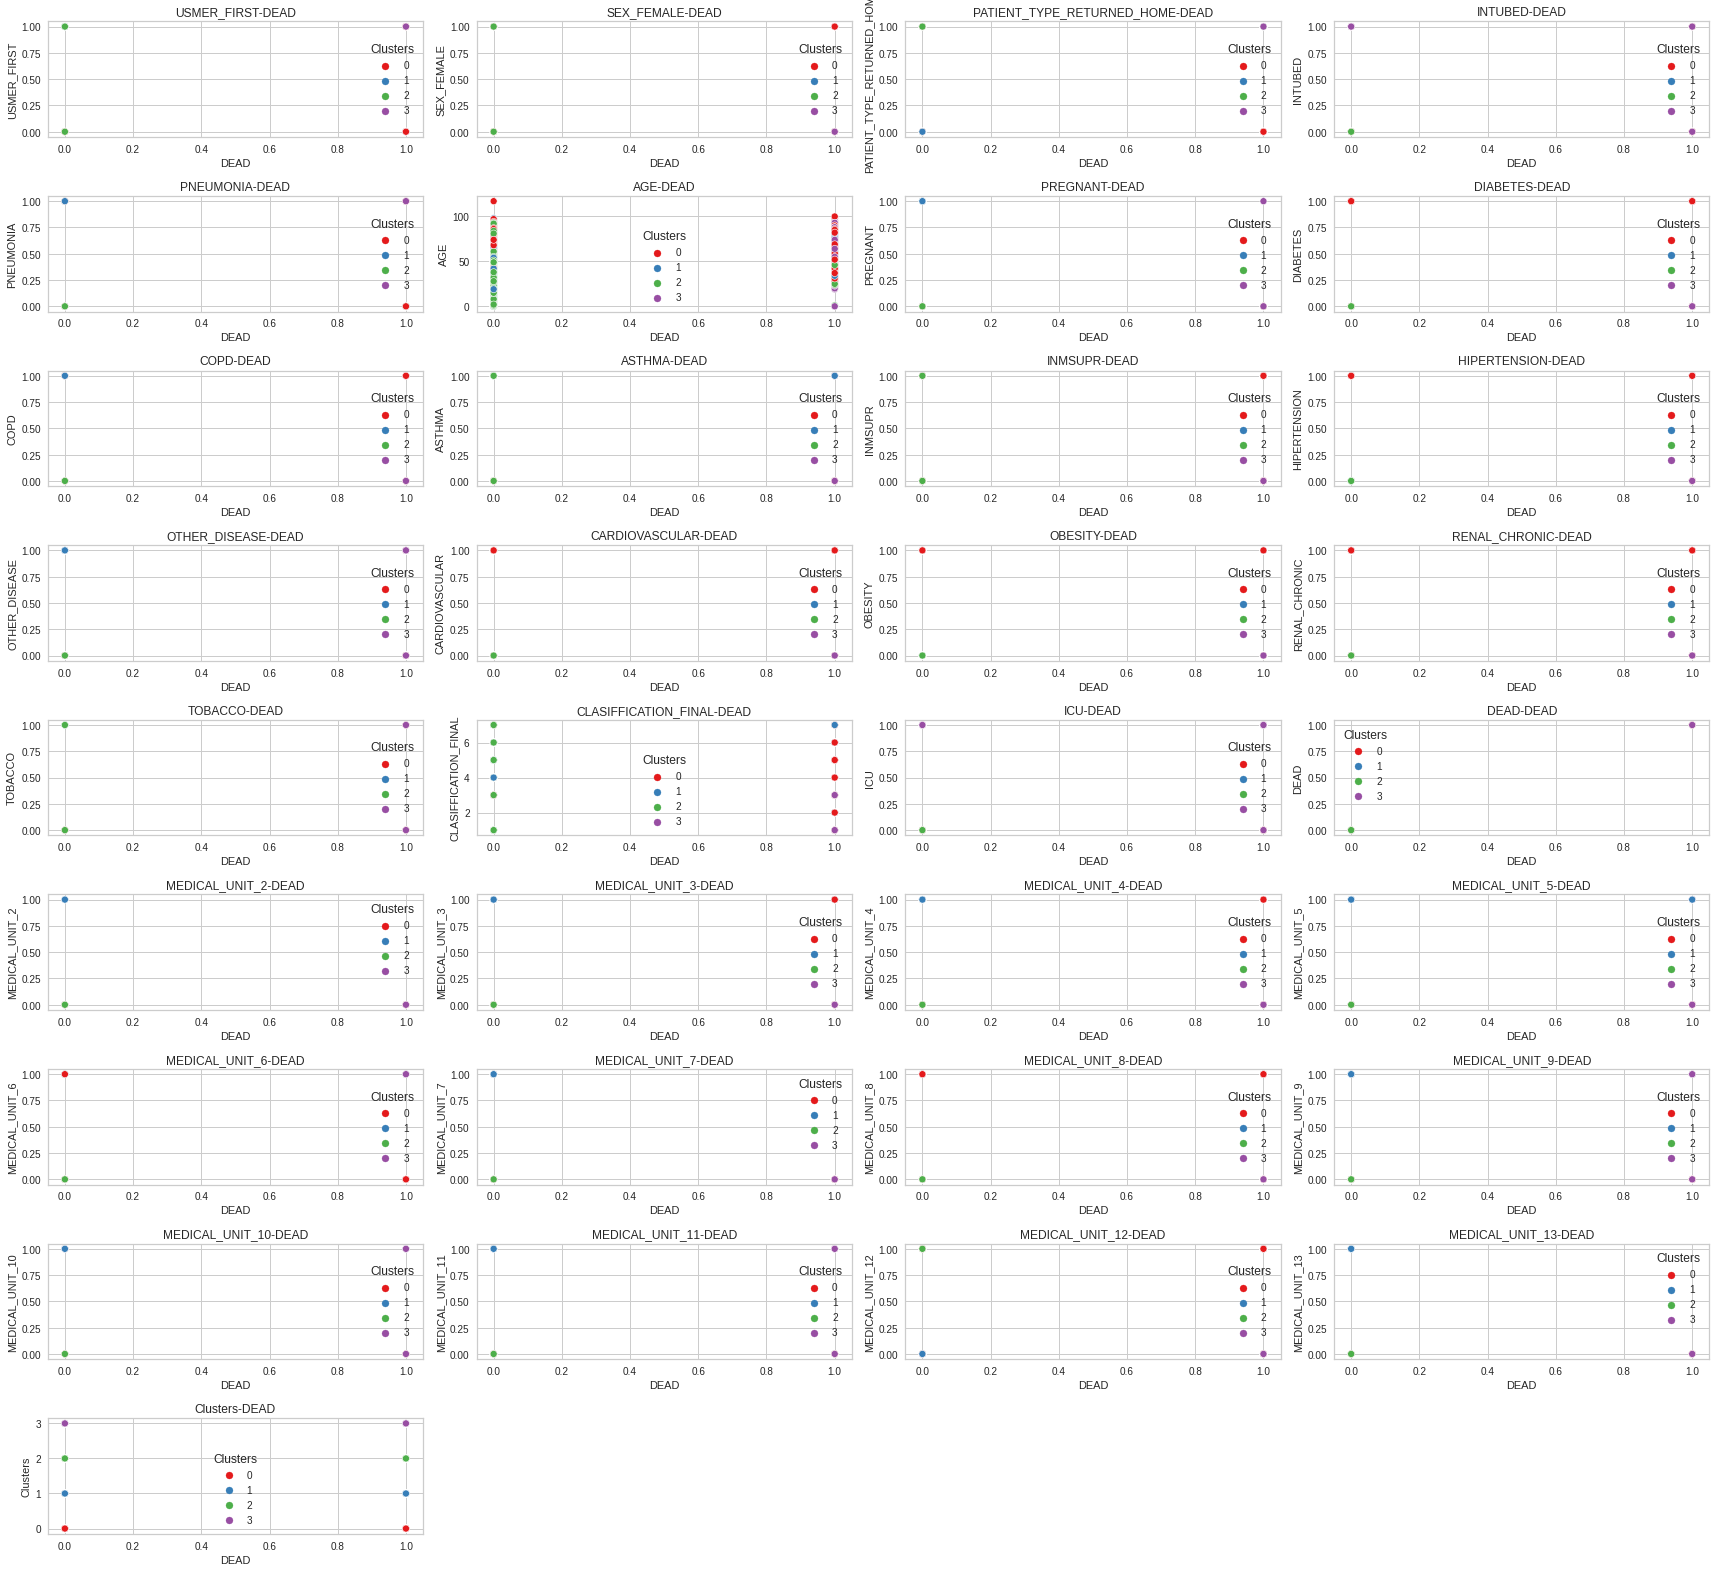

In [ ]:
fig = plt.figure(figsize=(24,24))
for i, column in enumerate(sampled_df.columns):
    ax = fig.add_subplot(10,4,i+1)
    sns.scatterplot(x=sampled_df['DEAD'], y=sampled_df[column], hue=sampled_df['Clusters'], palette='Set1')
    plt.ylabel(column)
    ax.set_title(column+"-DEAD")
fig.tight_layout()
plt.show()

* Clustering analysis will only useful with **"AGE"** feature and the target **"DEAD"** according to formations above.

### Clustering on the selected features

In [ ]:
clustering_df = pd.DataFrame([sampled_df['DEAD'], sampled_df['AGE']]).T
clustering_df.head()

,DEAD,AGE
706924,0,31
637103,0,51
60635,0,57
178721,0,44
1041423,0,23


#### Scaling the data

In [ ]:
scaler = StandardScaler()
clustering_scaled_df = scaler.fit_transform(clustering_df)

#### Creating agglomerative clustering model

In [ ]:
agglomerative = AgglomerativeClustering(n_clusters=4).fit(clustering_scaled_df)

# Adding clusters to pca_df and clustering_df
pca_df["Clusters"] = agglomerative.labels_
clustering_df["Clusters"]= agglomerative.labels_

#### Formation of the clusters based on "AGE" and "DEAD"

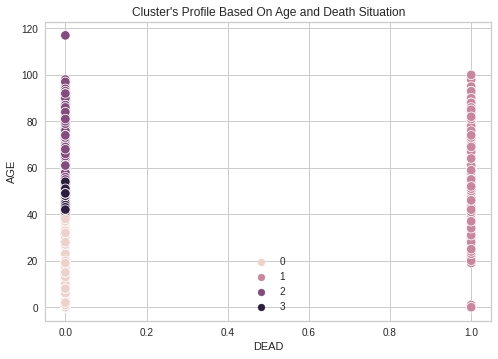

In [ ]:
fig, ax = plt.subplots()
sns.scatterplot(data=clustering_df, x=clustering_df["DEAD"], y=clustering_df["AGE"], hue=clustering_df["Clusters"], s=90, ax=ax)
ax.set_title("Cluster's Profile Based On Age and Death Situation")
ax.legend()
plt.show()

We can cluster this data as:
* People who died.
* People who didn't die and between 0-40 years old.
* People who didn't die and between 41-55 years old.
* People who didn't die and older than 55.

# **Predictive Modelling**
We will use **logistic regression** and **decision tree** classification algorithms for this project.

### Split target and predictors

Our target variable is "DEAD" column.

In [ ]:
X = df.drop('DEAD',axis=1)
y = df['DEAD']

### Split train and test sets
We choose train set size 75% and test set size 25%

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

### Scaling the data

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Creating Decision Tree Model
* First, we created decision tree and logistic regression models without giving any parameters.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train_scaled, y_train)
dtree_y_pred = dtree.predict(X_test_scaled)

### Creating Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train_scaled,y_train)
logreg_y_pred = logreg.predict(X_test_scaled)

### Comparing performances of the models

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

dtree_accuracy = accuracy_score(y_test, dtree_y_pred)
logreg_accuracy = accuracy_score(y_test, logreg_y_pred)

dtree_precision = precision_score(y_test, dtree_y_pred)
logreg_precision = precision_score(y_test, logreg_y_pred)

dtree_recall = recall_score(y_test, dtree_y_pred)
logreg_recall = recall_score(y_test, logreg_y_pred)

comparisonDf = pd.DataFrame([["Decision Tree", dtree_accuracy, dtree_precision, dtree_recall],
                        ["Logistic Regression", logreg_accuracy, logreg_precision, logreg_recall]],
                        columns=["Model","Accuracy","Precision","Recall"])
comparisonDf

,Model,Accuracy,Precision,Recall
0,Decision Tree,0.940165,0.596758,0.491070
1,Logistic Regression,0.949882,0.703999,0.510363


* We have good accuracy, but low precision and recall for both models.

* We will plot the confusion matrixes to see the reason of this issue.

### Confusion matrixes of the models

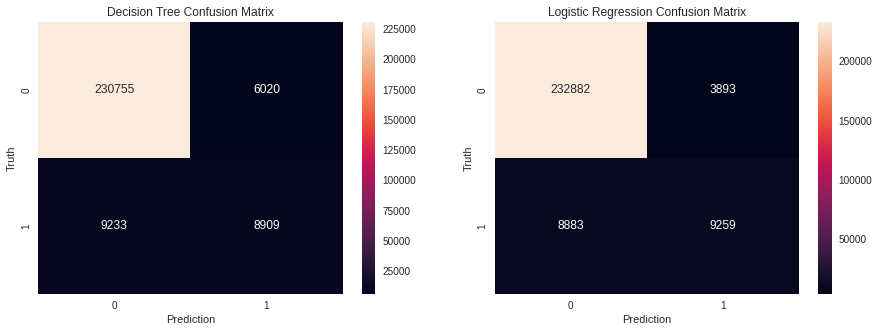

In [ ]:
from sklearn.metrics import confusion_matrix

dtree_cm = confusion_matrix(y_test, dtree_y_pred)
logreg_cm = confusion_matrix(y_test, logreg_y_pred)

fig, ax = plt.subplots(1,2,figsize=(15,5))

sns.heatmap(dtree_cm, annot=True, fmt='g', ax=ax[0])
ax[0].set_xlabel('Prediction')
ax[0].set_ylabel('Truth')
ax[0].set_title('Decision Tree Confusion Matrix')

sns.heatmap(logreg_cm, annot=True, fmt='g', ax=ax[1])
ax[1].set_xlabel('Prediction')
ax[1].set_ylabel('Truth')
ax[1].set_title('Logistic Regression Confusion Matrix')

plt.show()

* According to confusion matrix and the other metrics, seems like our models are always predicting 0.

* This explains the good accuracy, low precision and low recall.

* Imbalance in the target variable is the reason of this result.

* We can solve imbalanced dataset problem by setting the parameter **"class_weight"** to **"balanced"** for both decision tree and logistic regression models.

* With this approach we do not need to do undersampling or oversampling, it automatically adjusts class weights inversely proportional to class frequencies.

### Creating decision tree model with the new parameter

In [ ]:
dtree = DecisionTreeClassifier(class_weight='balanced')
dtree = dtree.fit(X_train_scaled, y_train)
dtree_y_pred = dtree.predict(X_test_scaled)

### Creating logistic regression model with the new parameter

In [ ]:
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train_scaled,y_train)
logreg_y_pred = logreg.predict(X_test_scaled)

### Comparing performances of the models

In [ ]:
dtree_accuracy = accuracy_score(y_test, dtree_y_pred)
logreg_accuracy = accuracy_score(y_test, logreg_y_pred)

dtree_precision = precision_score(y_test, dtree_y_pred)
logreg_precision = precision_score(y_test, logreg_y_pred)

dtree_recall = recall_score(y_test, dtree_y_pred)
logreg_recall = recall_score(y_test, logreg_y_pred)

comparisonDf = pd.DataFrame([["Decision Tree", dtree_accuracy, dtree_precision, dtree_recall],
                        ["Logistic Regression", logreg_accuracy, logreg_precision, logreg_recall]],
                        columns=["Model","Accuracy","Precision","Recall"])
comparisonDf

,Model,Accuracy,Precision,Recall
0,Decision Tree,0.914368,0.435706,0.688623
1,Logistic Regression,0.901580,0.413730,0.918201


* Seems like it fixed our problem with recall(especialy for the logistic regression model), but we have lower precisions now.

* We also have slightly lower accuracies now.

* We will investigate the reason of this and decide which model is better in the model evaluation step.

# **Model Evaluation and Visualizations**

### Confusion matrixes of the models

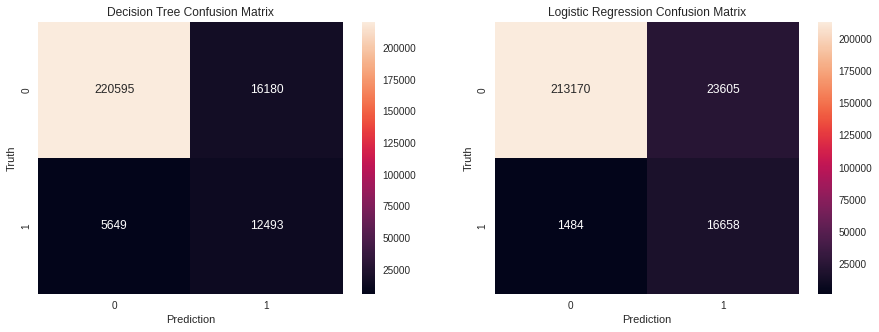

In [ ]:
dtree_cm = confusion_matrix(y_test, dtree_y_pred)
logreg_cm = confusion_matrix(y_test, logreg_y_pred)

fig, ax = plt.subplots(1,2,figsize=(15,5))

sns.heatmap(dtree_cm, annot=True, fmt='g', ax=ax[0])
ax[0].set_xlabel('Prediction')
ax[0].set_ylabel('Truth')
ax[0].set_title('Decision Tree Confusion Matrix')

sns.heatmap(logreg_cm, annot=True, fmt='g', ax=ax[1])
ax[1].set_xlabel('Prediction')
ax[1].set_ylabel('Truth')
ax[1].set_title('Logistic Regression Confusion Matrix')

plt.show()

* Since datapoints which have truth value for the target 0 is too much, it is natural to have greater false positive(FP) value than true positive(TP) value in both models.

* This leads to low precision value for the models.

* We cannot change test set's target distribution since the data from real world would have similar distribution.

* Since we used class_weight='balanced' parameter on the both models, oversampling or undersampling on training set would provide similar results.

* There is nothing more we can do about the low precision issue, but we can focus on the performance of the models about predicting for the datapoints which have truth value 1 and 0 for the target separately.

* Using class_weight='balanced' parameter parameter increased the positive(FP) values, but decreased the false negative(FP) values and increased the true positive(TP) values for the models.

* In other words, it has imporoved our models' ability of predicting for the datapoints which have truth value 1 for the target, but it reduced the ability of predicting for the datapoints which have truth value 0 for the target.

* Logistic regression has higher recall value, so it is better at predicting for the datapoints which have truth value 1 for the target.

* We will look False Positive Rate(FPR), True Negative Rate(TNR)(specificity) and True Positive Rate(TPR)(recall) to evaluate performance of the models about predicting for the datapoints which have truth value 1 and 0 for the target separately.

### Comparison of False Positive Rate(FPR), True Negative Rate(TNR)(Specificity) and True Positive Rate(TPR)(Recall)
* False positive rate(FPR) shows the error rate in predicting for the datapoints which have truth value 0 for the target.

* We will use 1-FPR (True Negative Rate(TNR)(Specificity)) to see the ablity of our model in predicting for the datapoints which have truth value 0 for the target.

* True Negative Rate allows us to make a better comparision with recall.

In [ ]:
dtree_fpr = dtree_cm[0][1] / (dtree_cm[0][1] + dtree_cm[0][0])
logreg_fpr = logreg_cm[0][1] / (logreg_cm[0][1] + logreg_cm[0][0])

dtree_tnr = 1-dtree_fpr
logreg_tnr = 1-logreg_fpr

fpr_tpr_df = pd.DataFrame([["Decision Tree", dtree_fpr, dtree_tnr, dtree_recall],
                        ["Logistic Regression", logreg_fpr, logreg_tnr, logreg_recall]],
                        columns=["Model", "False Positive Rate(FPR)", "True Negative Rate(TNR)(Specificity)", "True Positive Rate(TPR)(Recall)"])
fpr_tpr_df

,Model,False Positive Rate(FPR),True Negative Rate(TNR)(Specificity),True Positive Rate(TPR)(Recall)
0,Decision Tree,0.068335,0.931665,0.688623
1,Logistic Regression,0.099694,0.900306,0.918201


* Decision tree is better at predicting for the datapoints which have truth value 0 for the target.(It has greater TNR)

* Logistic regression is better at predicting for the datapoints which have truth value 1 for the target.(It has greater TPR)

* Since the difference between recalls is significantly larger than the difference between true negative rates, **logistic regression model is better according to these metrics**.

### ROC curves for the models

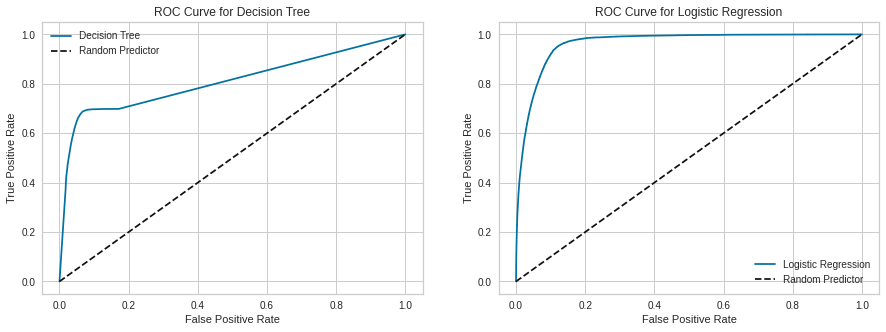

,Model,AUC for ROC Curve
0,Logistic Regression,0.963125
1,Decision Tree,0.808718


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fig, ax = plt.subplots(1,2,figsize=(15,5))

# ROC curve for decision tree
dtree_y_pred_proba = dtree.predict_proba(X_test_scaled)[::,1]
fpr, tpr, thresholds = roc_curve(y_test,  dtree_y_pred_proba)
dtree_auc_roc = roc_auc_score(y_test, dtree_y_pred_proba)

ax[0].plot(fpr, tpr, label='Decision Tree')
ax[0].plot([0,1], [0,1], "k--", label='Random Predictor')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('ROC Curve for Decision Tree')
ax[0].legend()

# ROC curve for logistic regression
logreg_y_pred_proba = logreg.predict_proba(X_test_scaled)[::,1]
fpr, tpr, thresholds = roc_curve(y_test,  logreg_y_pred_proba)
logreg_auc_roc = roc_auc_score(y_test, logreg_y_pred_proba)

ax[1].plot(fpr, tpr, label='Logistic Regression')
ax[1].plot([0,1], [0,1], "k--", label='Random Predictor')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('ROC Curve for Logistic Regression')
ax[1].legend()

plt.show()

auc_roc_df = pd.DataFrame([["Logistic Regression", logreg_auc_roc],
                        ["Decision Tree", dtree_auc_roc]],
                        columns=["Model", "AUC for ROC Curve"])
auc_roc_df

* We get a nice ROC curve from logistic regression.

* This means logistic regression has good performance on predicting for the datapoints which have truth value 1 and 0 for the target separately.

* Logistic regression has greater AUC for ROC curve.

* **According to ROC curves and AUCs, logistic regression is better.**

### Precision-recall curves for the models

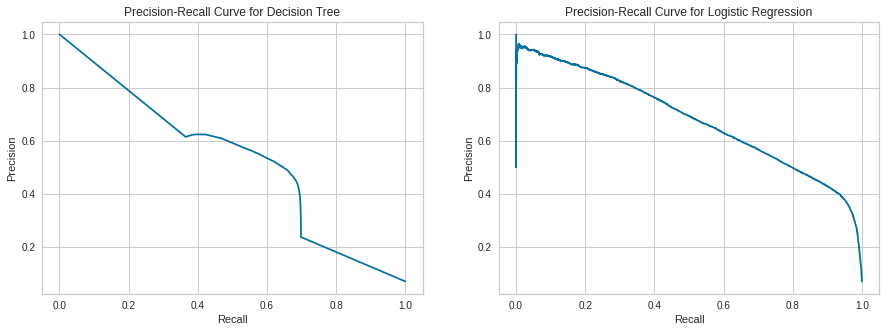

,Model,AUC for Precision-Recall Curve
0,Logistic Regression,0.680805
1,Decision Tree,0.528617


In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

fig, ax = plt.subplots(1,2,figsize=(15,5))

# Precision-recall curve for decision tree
precision, recall, thresholds = precision_recall_curve(y_test, dtree_y_pred_proba)
dtree_auc_pr = auc(recall, precision)

ax[0].plot(recall, precision)
ax[0].set_xlabel('Recall')
ax[0].set_ylabel('Precision')
ax[0].set_title('Precision-Recall Curve for Decision Tree')

# Precision-recall curve for logistic regression
precision, recall, thresholds = precision_recall_curve(y_test, logreg_y_pred_proba)
logreg_auc_pr = auc(recall, precision)

ax[1].plot(recall, precision)
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
ax[1].set_title('Precision-Recall Curve for Logistic Regression')

plt.show()

auc_pr_df = pd.DataFrame([["Logistic Regression", logreg_auc_pr],
                        ["Decision Tree", dtree_auc_pr]],
                        columns=["Model", "AUC for Precision-Recall Curve"])
auc_pr_df

* Since we have low precisions for the both models, precision-recall curves are not so good.

* Logistic regression has better precision-recall curve.

* Logistic regression has greater AUC for precision-recall curve.

* **According to precision-recall curves and AUCs, logistic regression is better.**

### Comparison of the all metrics that we discussed before

In [ ]:
comparisonDf = pd.DataFrame([["Logistic Regression", logreg_accuracy, logreg_precision, logreg_fpr, logreg_tnr, logreg_recall, logreg_auc_roc, logreg_auc_pr],
                        ["Decision Tree", dtree_accuracy, dtree_precision, dtree_fpr, dtree_tnr, dtree_recall, dtree_auc_roc, dtree_auc_pr]],
                        columns=["Model", "Accuracy", "Precision", "False Positive Rate(FPR)", "True Negative Rate(TNR)(Specifity)", "Recall(TPR)", "AUC for ROC", "AUC for Precision-Recall Curve"])
comparisonDf

,Model,Accuracy,Precision,False Positive Rate(FPR),True Negative Rate(TNR)(Specifity),Recall(TPR),AUC for ROC,AUC for Precision-Recall Curve
0,Logistic Regression,0.901580,0.413730,0.099694,0.900306,0.918201,0.963125,0.680805
1,Decision Tree,0.914368,0.435706,0.068335,0.931665,0.688623,0.808718,0.528617


* **Decision tree has higher accuracy** than logistic regression, but there is **no significant difference between the accuracies** of the models.

* **Decision tree has higher precision** than logistic regression, but there is **no significant difference between the precisions** of the models.

* **Decision tree has lower false positive rate(FPR)** than logistic regression, but there is **no significant difference between the false positive rates(FPRs)** of the models.

* **Decision tree has higher true negative rate(TNR)(specifity)** than logistic regression, but there is **no significant difference between the true negative rates(TNRs)(specifities)** of the models.

* **Logistic regression has higher recall** than decision tree and there is **a significant difference between the recalls** of the models.

* **Logistic regression has higher AUC for ROC** than decision tree and there is **a significant difference between the AUC for ROCs** of the models.

* **Logistic regression has higher AUC for precision-recall curve** than decision tree and there is **a significant difference between the AUC for precision-recall curves** of the models.

* Since we have an imbalanced dataset, false positive rate(FPR), true negative rate(TNR)(specifity) and recall are more important than the precision.

* **In conculusion**, even though decision tree has better accuracy, precision, true negative rate(TNR)(specifity) and false positive rate(FPR) than logistic regression, because of logistic regression has better recall, AUC for ROC and AUC for precision-recall curve, and the differences between the metrics considered **logistic regression is a better model than decision tree for this dataset in these conditions**.